In [12]:
import matplotlib.pyplot as plt
import numpy as np

## 1.1
### Определение 
 ReLU - активационная функция в нейронных сетях. Данная функция "включает" и "выключает" нейроны. Она выделяется своей нелинейностью и стабильностью и возрастает на отрезке = {0, +∞}. До этого момента функция ни  не возрастает, ни не убывает, а просто находится на оси OX. 
- Формула ReLU: ReLU(z) = max(0, z). Данная формула как раз описывает одно из свойств. Суть формулы: 
- Если входное число меньше либо равно нулю, то на выходе будет 0. 
- Если на входе число > 0, то оно остается прежним. Таким образом, ReLU активирует нейрон, если его входное значение больше нуля, и не активирует, если значение меньше или равно нулю.

### Непрерывность
 Функция f(z) называется непрерывной в точке a , если маленькое изменение входа z влечёт маленькое изменение выхода f(z) . Формально это записывается так:

- ∀ε > 0, ∃δ > 0: ∀z, |z - a| < δ ⇒ |f(z) - f(a)| < ε. 

Доказательство что ReLU непрерывна при любом z ∈ ℝ.
 - Случай первый a < 0, тогда в окрестности точки a (например, δ<∣a∣), вход z остаётся меньше нуля. Значит, ReLU(z)=0 для всех z∈(a−δ,a+δ)
 ReLU(a)=0 ∣ReLU(z)−ReLU(a)∣=∣0−0∣=0<ε

- Случай второй a > 0, тогда в окрестности точки a (например, δ<∣a∣), вход z остаётся больше нуля. Значит, ReLU(z)=z для всех z∈(a−δ,a+δ)
ReLU(ReLU(a)=a ∣ReLU(z)−ReLU(a)∣=∣z−a∣<δ<ε)

- Случай третий a = 0, тогда в окрестности точки a (например, δ=1), вход z может быть как больше, так и меньше нуля. Значит, ReLU(z)=max(0,z) для всех z∈(−1,1) В точке z=0 функция ReLU "ломается"
∣ReLU(z)−ReLU(a)∣=∣max(0,z)−0∣=∣max(0,z)∣≤∣z∣<δ<ε

### Дифференцируемость:

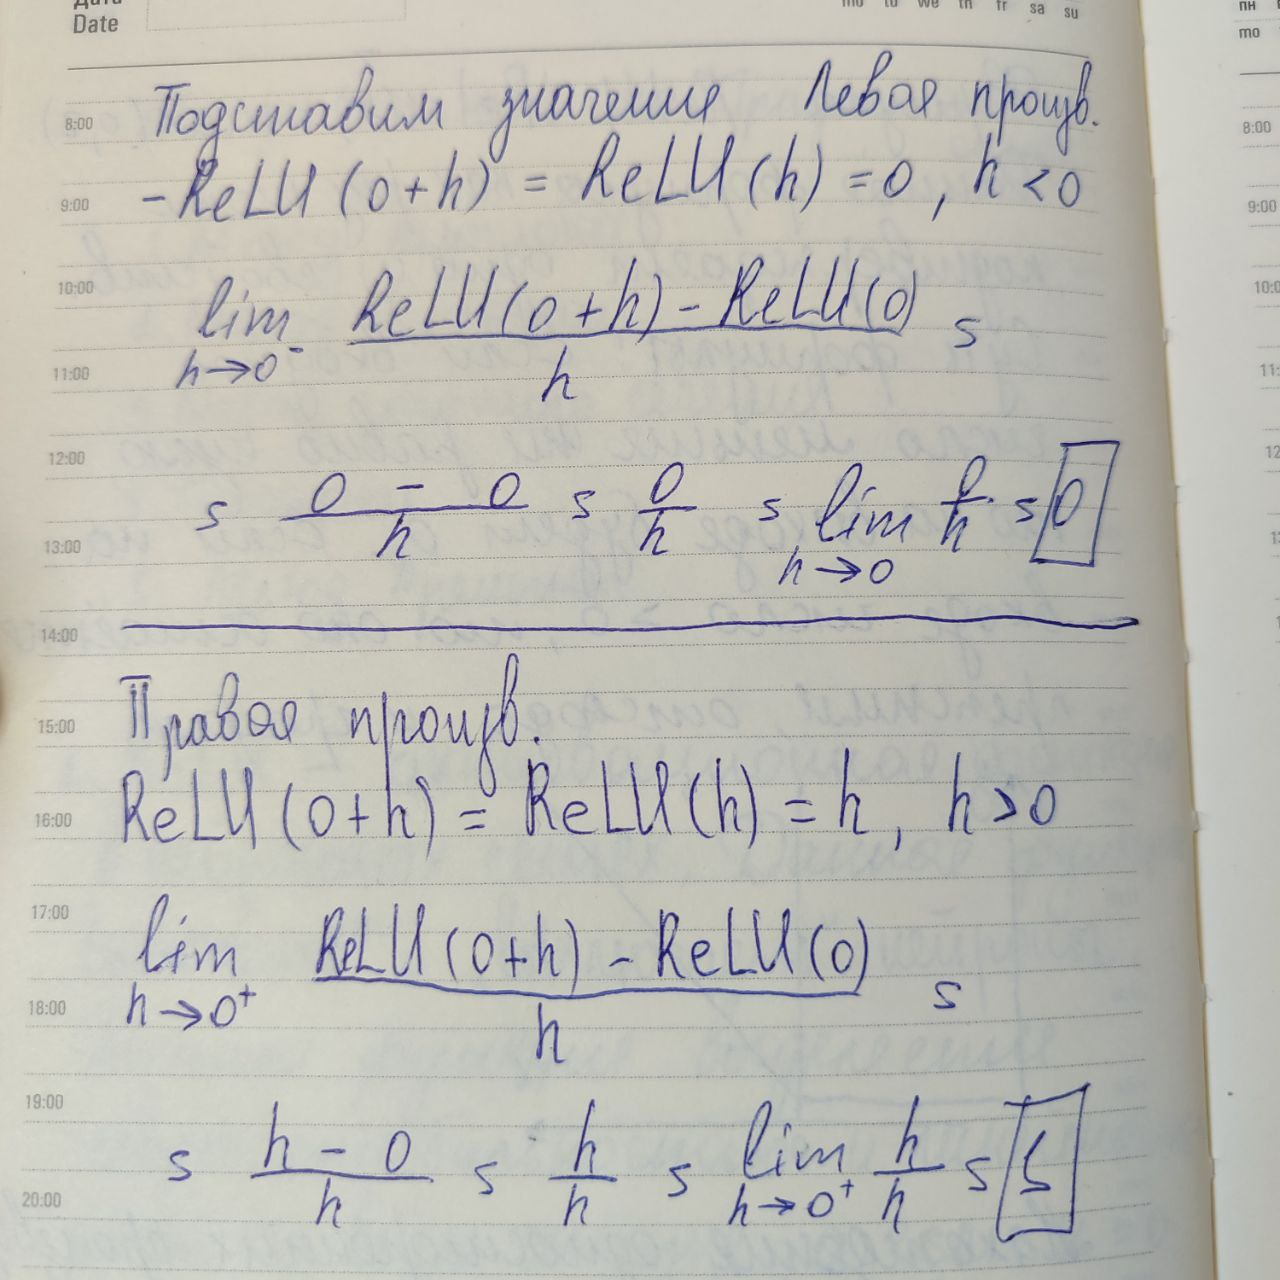

In [13]:
from IPython.display import Image, display
display(Image(filename='производные.jpg'))

Так как левая и правая производные не совпадают , функция не дифференцируема в точке z=0.
Это связано с "ломаной" структурой ReLU: слева от нуля функция горизонтальна (y=0), а справа — прямая (y=z).

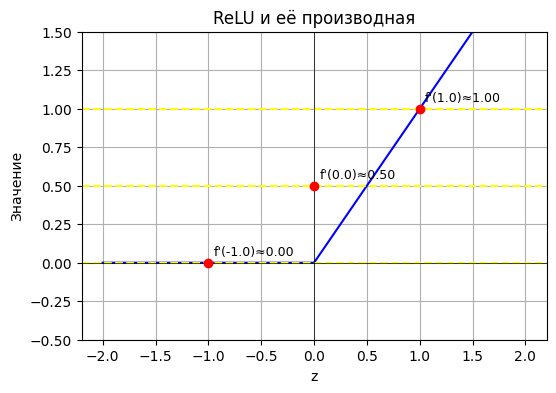

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def relu(z):
    return np.maximum(0, z)

def derivative(f, z0, eps=0.001):
    return (f(z0 + eps) - f(z0 - eps)) / (2 * eps)

points = [-1.0, 0.0, 1.0]

z = np.linspace(-2, 2, 400)
y = relu(z)

plt.figure(figsize=(6, 4))
plt.plot(z, y, label='ReLU(z)', color='blue')

for z0 in points:
    dy = derivative(relu, z0)
    plt.axhline(dy, color='yellow', linestyle='--', linewidth=1.5)
    plt.scatter(z0, dy, color='red', zorder=5)
    plt.text(z0 + 0.05, dy + 0.05, f"f'({z0})≈{dy:.2f}", fontsize=9)

plt.title("ReLU и её производная")
plt.xlabel("z")
plt.ylabel("Значение")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.ylim(-0.5, 1.5)
plt.show()

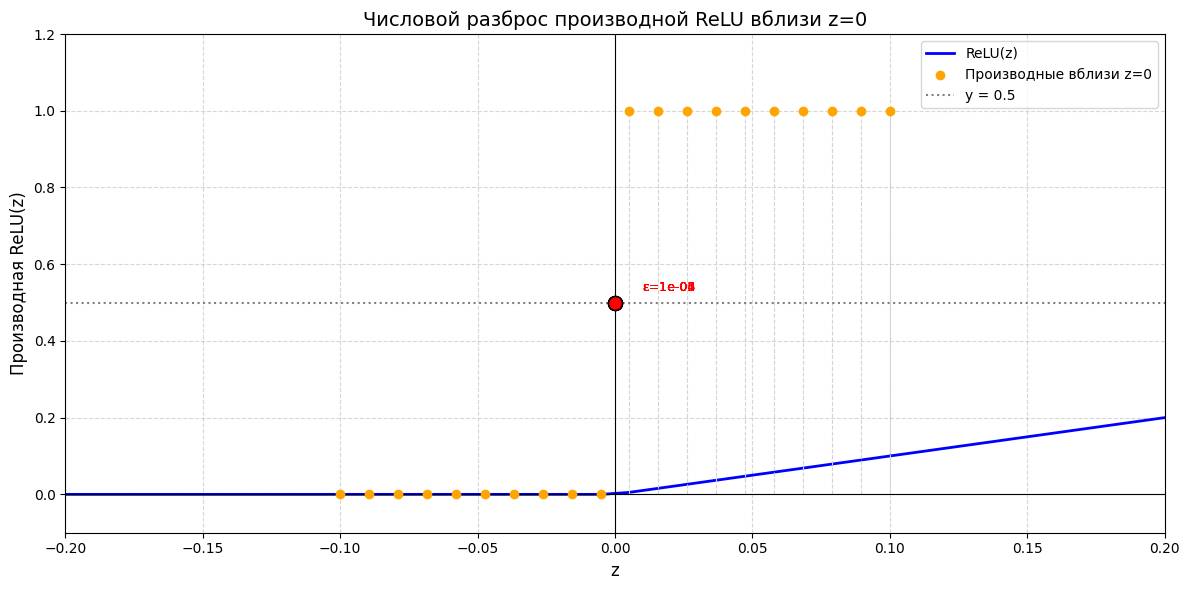

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def relu(z):
    return np.maximum(0, z)

def finite_difference(f, z, epsilon=1e-4):
    return (f(z + epsilon) - f(z - epsilon)) / (2 * epsilon)

z_values = np.linspace(-2, 2, 400)
relu_values = relu(z_values)

z_near_zero = np.linspace(-0.1, 0.1, 20)
derivatives_near_zero = [finite_difference(relu, z, epsilon=0.001) for z in z_near_zero]

epsilons = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6]
derivatives_vs_epsilon = [finite_difference(relu, 0.0, eps) for eps in epsilons]

plt.figure(figsize=(12, 6))

plt.plot(z_values, relu_values, label='ReLU(z)', color='blue', linewidth=2)

plt.scatter(z_near_zero, derivatives_near_zero, color='orange', label='Производные вблизи z=0', zorder=5)
for z, deriv in zip(z_near_zero, derivatives_near_zero):
    plt.plot([z, z], [0, deriv], color='lightgray', linestyle='--', linewidth=0.8)

for eps, deriv in zip(epsilons, derivatives_vs_epsilon):
    plt.scatter(0, deriv, color='red', edgecolor='black', s=100, zorder=6)
    plt.text(0.01, deriv + 0.03, f"ε={eps:.0e}", fontsize=9, color='red')

plt.axhline(y=0.5, color='gray', linestyle=':', linewidth=1.5, label="y = 0.5")

plt.title('Числовой разброс производной ReLU вблизи z=0', fontsize=14)
plt.xlabel('z', fontsize=12)
plt.ylabel('Производная ReLU(z)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.legend()
plt.xlim(-0.2, 0.2)
plt.ylim(-0.1, 1.2)
plt.tight_layout()
plt.show()

# 1.2

### Определение 
Leaky ReLU — это модификация стандартной функции ReLU , которая решает проблему "мертвых нейронов" .
Она отличается тем, что не обнуляет отрицательные входы , а умножает их на небольшое число α (обычно α=0.01 )

Формула: 
    {
        z, z>0
        az, z≤0, где α — небольшое число, обычно 0.01 
    }
- При z≥0 :
Leaky ReLU ведёт себя как обычная ReLU: возвращает входное значение z .
Например:
ℓReLU(3)=3,ℓReLU(0)=0
- При z<0 :
Leaky ReLU возвращает маленькое отрицательное значение αz , где α=0.01 .

### Непрерывность
Данная функция не прерывна на всем отрезке, так как если смотреть на график, то можно увидеть, что функция не имеет разрывов. Это означает, что функция будет гладкой и не будет иметь "скачков"

### Дифференцируемость
limₕ→0⁻ (ℓReLU(0 + h) − ℓReLU(0)) / h,
limₕ→0⁺ (ℓReLU(0 + h) − ℓReLU(0)) / h.   при z=0


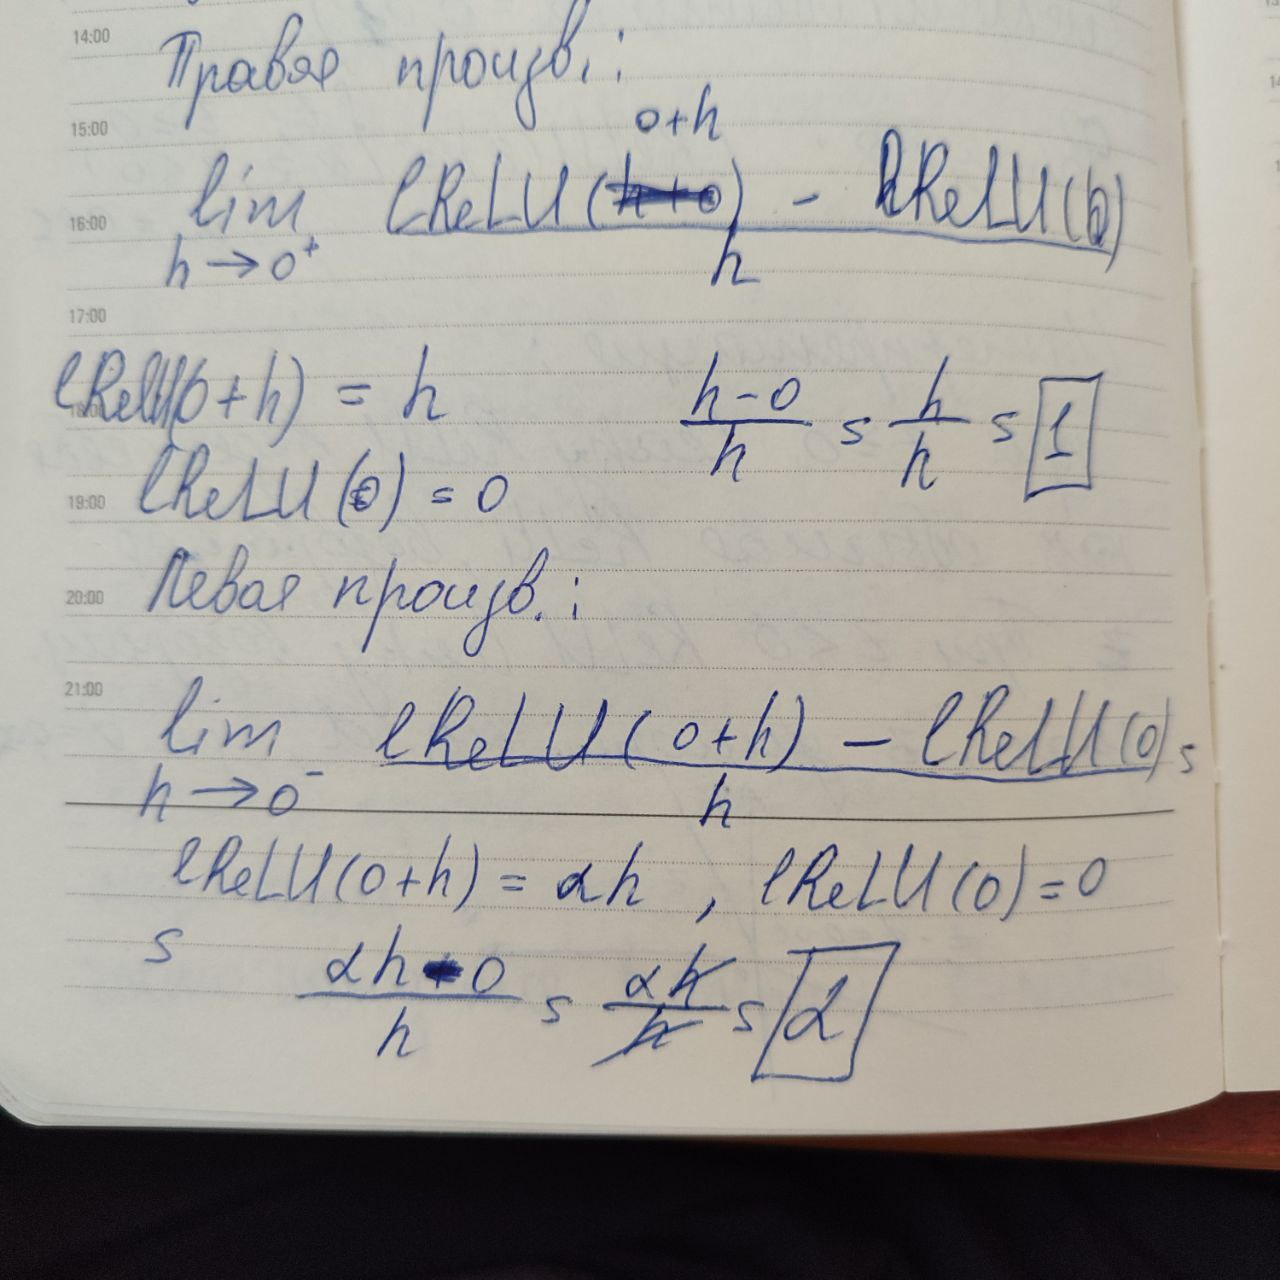

In [1]:
from IPython.display import Image, display
display(Image(filename='производные1.jpg'))

На счет ступеньки, то есть перехода от 0 к +бесконечнсти, можно сказать, что у Leaky ReLU она намного плавная, потому что значение между левой и правой производной равно от 0,01 до 1, но не 0, как у ReLU.

### Рисунок + численный пример


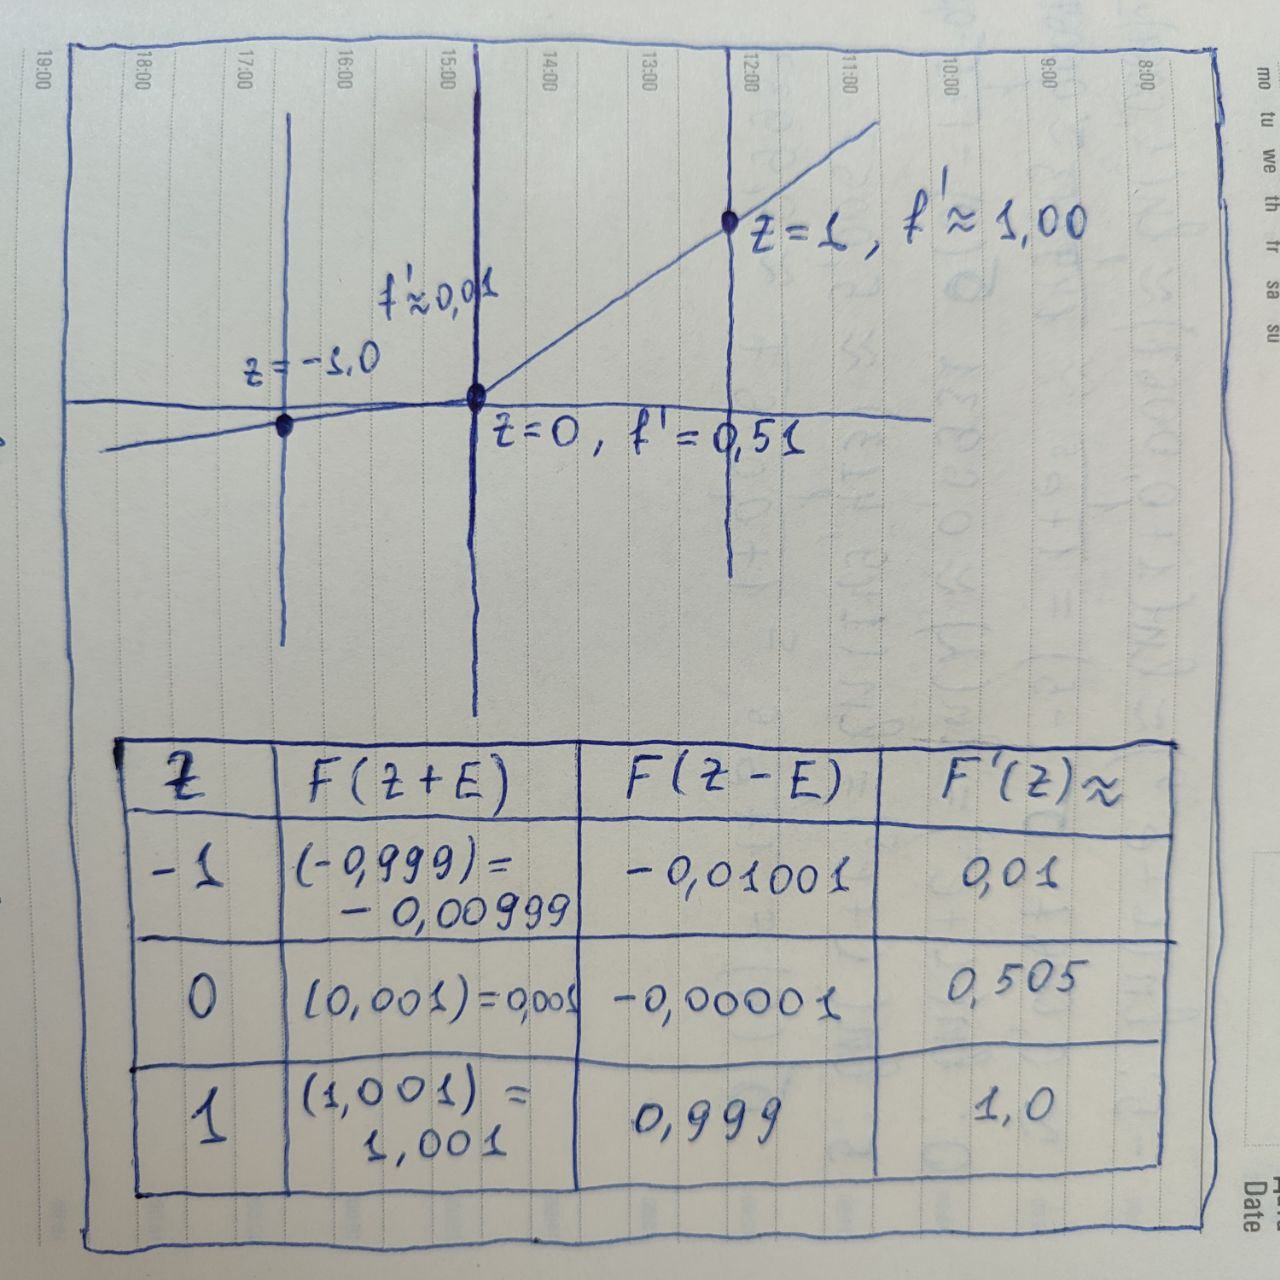

In [4]:
from IPython.display import Image, display
display(Image(filename='производные4.jpg'))

## 1.3

### Определение 
Softplus(z) — это гладкая функция активации , которая служит гладкой альтернативой ReLU .
Она определяется формулой:

Softplus(z)=ln(1+e z)

### Непрерывность и гладкость 
- Функция e^z
Экспонента e^z:
Непрерывна на всей области определения z∈R
Бесконечно дифференцируема (гладкая)
- Функция 1+e^z
Прибавление константы 1 к непрерывной функции e^z:
Результат 1+e^z также непрерывен и гладок
- Функция ln(x)
Логарифм ln(x): Непрерывен и гладок при x>0
В нашем случае x=1+e^z > 0 всегда (так как e^z > 0 )
- Композиция функций
Softplus — это композиция ln(1+e^z) :
e^z — гладкая
1+e^z — гладкая
ln(1+e^z) — гладкая, так как композиция гладких функций

### Вывод производной:


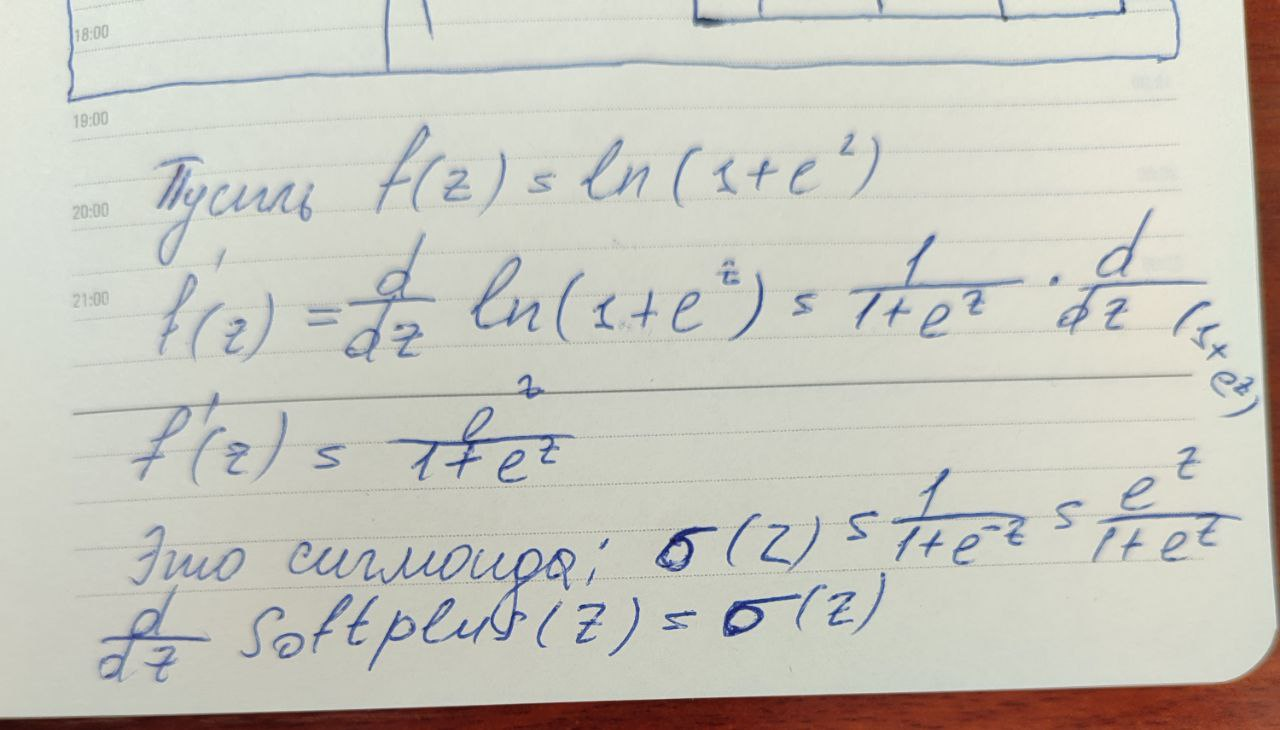

In [5]:
from IPython.display import Image, display
display(Image(filename='производные2.jpg'))

### Численные проверки:

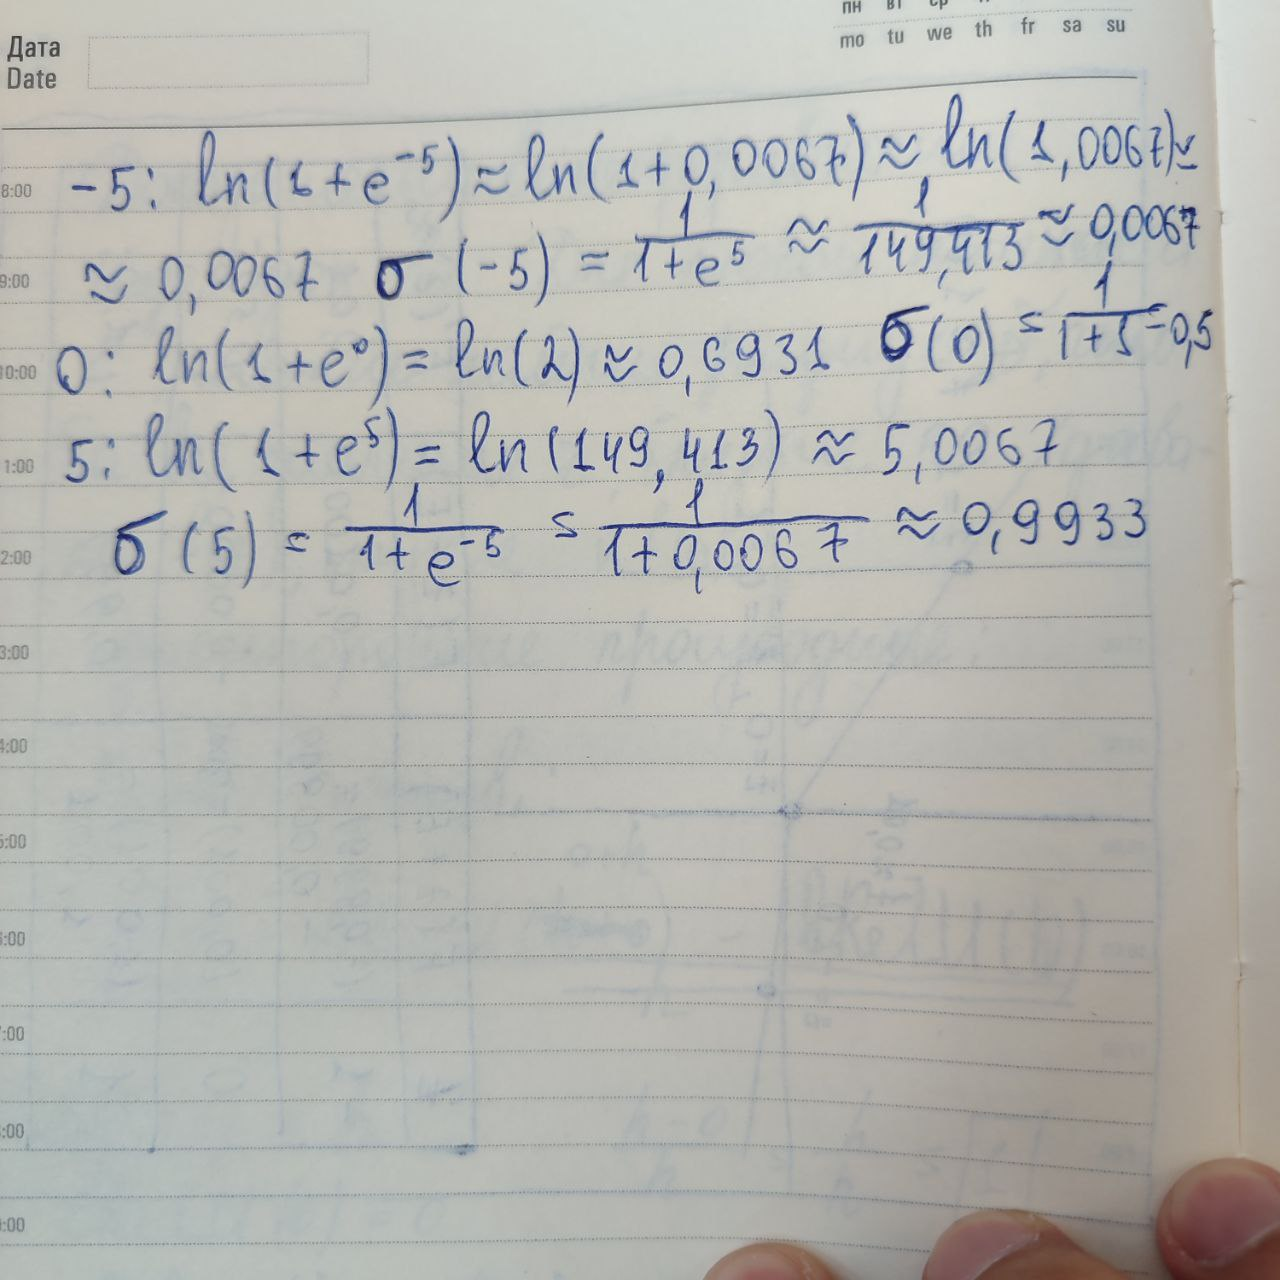

In [6]:
from IPython.display import Image, display
display(Image(filename='производные3.jpg'))

### График:

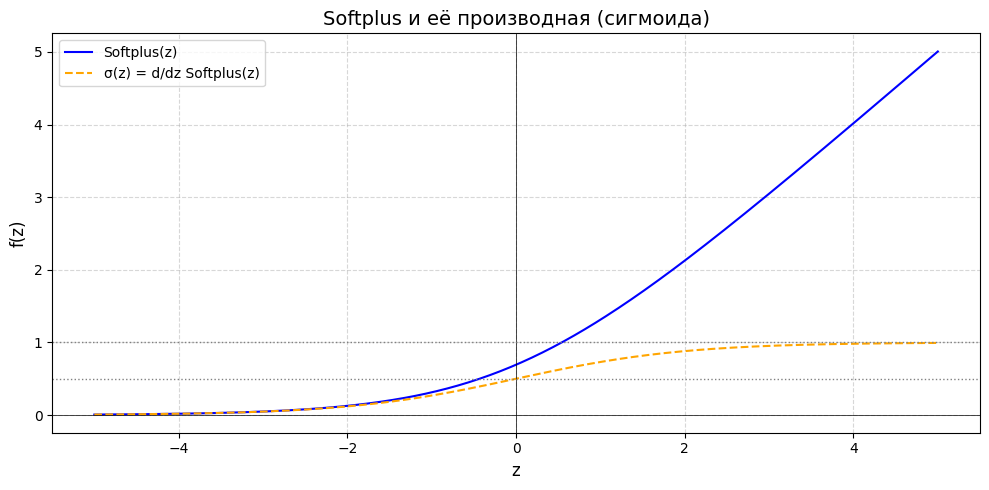

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def softplus(z):
    return np.log(1 + np.exp(z))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z_values = np.linspace(-5, 5, 400)
softplus_values = softplus(z_values)
sigmoid_values = sigmoid(z_values)

plt.figure(figsize=(10, 5))
plt.plot(z_values, softplus_values, label='Softplus(z)', color='blue')
plt.plot(z_values, sigmoid_values, label='σ(z) = d/dz Softplus(z)', color='orange', linestyle='--')

plt.title('Softplus и её производная (сигмоида)', fontsize=14)
plt.xlabel('z', fontsize=12)
plt.ylabel('f(z)', fontsize=12)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.axhline(1, color='gray', linestyle=':', linewidth=1)  # Горизонтальная линия y=1
plt.axhline(0.5, color='gray', linestyle=':', linewidth=1)  # Горизонтальная линия y=0.5
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 1.4

### Сравнительный анализ (таблица):

In [9]:
import pandas as pd
t = pd.read_csv('tt.csv', on_bad_lines='skip')
t

,Функция активации,Непрерывна при всех z?,Дифференцируема при всех z?,Точки разрыва/недифференцируемости,Односторонние производные в проблемных точках,Сложность вычисления f(z),Сложность вычисления f'(z),Основные ловушки
0,ReLU,Да,"Нет, в точке z=0",z = 0,f'(-0) = 0; f'(+0) = 1,1 сравнение + max → ~1 операция,1 сравнение → ~1 операция,Мёртвые нейроны (z<0 → нулевой градиент)
1,Leaky ReLU,Да,"Нет, в точке z=0",z = 0,"f'(-0) = α; f'(+0) = 1 (например, α = 0.01)",1 сравнение + умножение → ~2 операции,1 сравнение (и иногда умножение) → ~1–2 операции,"Меньше мёртвых нейронов, но маленький градиент..."
2,Softplus,Да,"Да, везде",Нет,Не применимо (гладкая функция),exp + сложение + логарифм → дорогая (~десятки ...,exp + сложение + деление → дорогая (~десятки о...,Затухание градиента при больших отрицательных ...


## 2.1

### 2.1 Приближённая производная ReLU (3 точки):

In [12]:
def relu(z): return max(0.0, z)
def approx_derivative(f, z, eps=1e-3): return (f(z + eps) - f(z - eps)) / (2*eps)
for z0 in [-1.0, 0.0, 2.0]: print(f"ReLU' approx at {z0} =", approx_derivative(relu, z0))

ReLU' approx at -1.0 = 0.0
ReLU' approx at 0.0 = 0.5
ReLU' approx at 2.0 = 0.9999999999998899


#### Пояснения
- Если вход z<0 , ReLU "убивает" сигнал — градиент равен нулю
- Это не настоящая производная, а усреднение между 0 (слева) и 1 (справа), потому что ReLU не дифференцируема в z=0 . Метод конечных разностей думает, что функция плавно переходит от 0 к 1, и возвращает среднее значение .
- Число 0.9999999999998899 — это округление , связанное с ограниченной точностью вычислений.
В реальности это почти 1 , но не точно 1 из-за ошибок округления.


## 2.2

In [13]:
def leaky_relu(z, α=0.01): return z if z >= 0 else α*z
for z0 in [-1.0, 0.0, 2.0]: print(f"Leaky ReLU' approx at {z0} =", approx_derivative(leaky_relu, z0))

Leaky ReLU' approx at -1.0 = 0.009999999999999593
Leaky ReLU' approx at 0.0 = 0.505
Leaky ReLU' approx at 2.0 = 0.9999999999998899


#### Пояснение 
- Число 0.009999999999999593 — это вычислительная погрешность , связанная с ограниченной точностью чисел с плавающей точкой. Теоретическое значение: α=0.01. При z<0 Leaky ReLU ведёт себя как αz , где α=0.01.
- 0.505 — это усреднение между α и 1 , так как функция не дифференцируема в z=0 , но метод конечных разностей "видит" переход между двумя участками.В точке z=0 Leaky ReLU "ломается"
- Число 0.9999999999998899 — это округление. Теоретическое значение: 1.0 При z>0 Leaky ReLU совпадает с z , её производная = 1 .

## 2.3

In [14]:
import math
def softplus(z): return math.log(1 + math.exp(z))
def sigmoid(z): return 1 / (1 + math.exp(-z))
for z0 in [-5.0, 0.0, 5.0]:
    sp = softplus(z0)
    sp_deriv = (softplus(z0 + 1e-3) - softplus(z0 - 1e-3)) / 2e-3
    sg = sigmoid(z0)
    print(f"z={z0}: Softplus={sp:.6f}, approx derivative={sp_deriv:.6f}, sigmoid={sg:.6f}")

z=-5.0: Softplus=0.006715, approx derivative=0.006693, sigmoid=0.006693
z=0.0: Softplus=0.693147, approx derivative=0.500000, sigmoid=0.500000
z=5.0: Softplus=5.006715, approx derivative=0.993307, sigmoid=0.993307


#### Пояснение 

Производная Softplus равна сигмоиде σ(z) — это не совпадение , а математическое свойство .
Приближённое численное дифференцирование точно воспроизводит это соотношение.
- При z=−5.0 :
Softplus(−5)≈0.006715 — близко к нулю
σ(−5)= 1/1+e5≈0.0067
Производная = 0.006693 — совпадает с сигмоидой
- В точке z=0 :
σ(0)=0.5
График Softplus имеет "средний наклон" — 0.5
- При z=5.0 :
Softplus(5)≈5.0067 — близко к z
σ(5)=1/1+e в −5 степени.≈0.9933
Производная ≈ 0.9933 — совпадает с сигмоидой

## 2.4

In [15]:
print(softplus(50)) 
print(sigmoid(50)) 
print(sigmoid(-50))  

50.0
1.0
1.928749847963918e-22


Когда z становится очень большим, экспонента e^z становится настолько гигантской, что добавление 1 к ней практически не влияет на результат — логарифм от такого числа почти равен самому z . Для сигмоиды при больших z экспонента e^−z становится настолько маленькой, что знаменатель 1+e^−z превращается почти в 1, и сигмоида стремится к 1. А при очень маленьких z (например, −50 ) наоборот, e^−z становится огромной, и сигмоида приближается к 0.

## 3.1

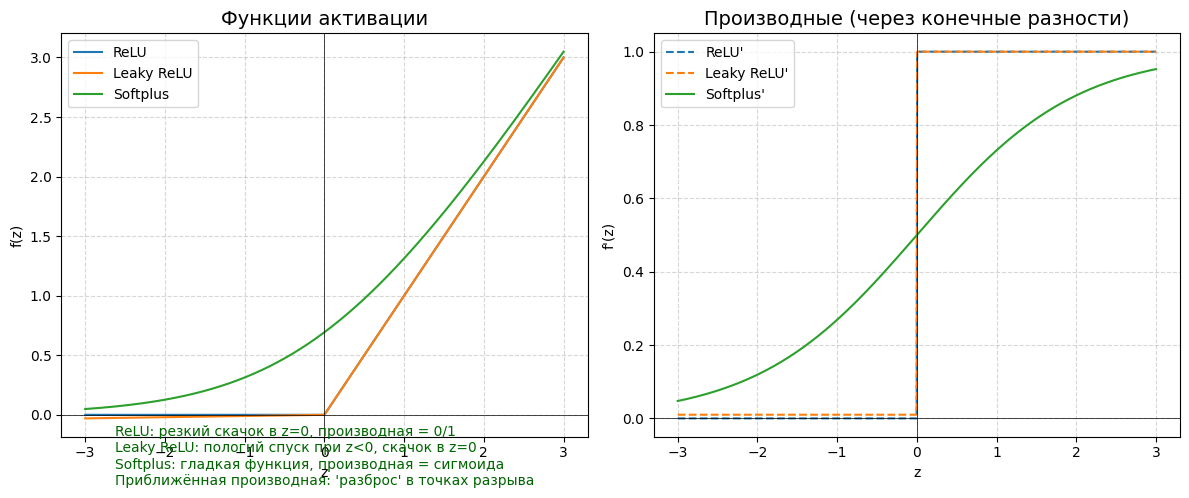

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def relu(z): return np.maximum(0, z)
def leaky_relu(z, alpha=0.01): return np.where(z >= 0, z, alpha * z)
def softplus(z): return np.log(1 + np.exp(z))

def finite_diff(f, z, eps=0.001):
    return (f(z + eps) - f(z - eps)) / (2 * eps)

z = np.linspace(-3, 3, 1000)
relu_vals = relu(z)
lrelu_vals = leaky_relu(z)
soft_vals = softplus(z)

d_relu = [finite_diff(relu, zi) for zi in z]
d_lrelu = [finite_diff(lambda x: leaky_relu(x), zi) for zi in z]
d_soft = [finite_diff(softplus, zi) for zi in z]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(z, relu_vals, label='ReLU')
plt.plot(z, lrelu_vals, label='Leaky ReLU')
plt.plot(z, soft_vals, label='Softplus')
plt.title('Функции активации', fontsize=14)
plt.xlabel('z')
plt.ylabel('f(z)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
plt.plot(z, d_relu, label="ReLU'", linestyle='--')
plt.plot(z, d_lrelu, label="Leaky ReLU'", linestyle='--')
plt.plot(z, d_soft, label="Softplus'", linestyle='-')
plt.title('Производные (через конечные разности)', fontsize=14)
plt.xlabel('z')
plt.ylabel("f'(z)")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.figtext(0.1, 0.02, "ReLU: резкий скачок в z=0, производная = 0/1\n"
                         "Leaky ReLU: пологий спуск при z<0, скачок в z=0\n"
                         "Softplus: гладкая функция, производная = сигмоида\n"
                         "Приближённая производная: 'разброс' в точках разрыва", fontsize=10, color='darkgreen')

plt.tight_layout()
plt.show()

Экспонента e^z:
Экспонента — бесконечно дифференцируемая функция на всей области определения z∈R .
Нет "изломов", "скачков" или точек разрыва ⇒ гладкая.
Сложение : 1+e^z:
Добавление константы к гладкой функции e^z
  ⇒ результат также гладкий .
1+e^z > 0 всегда ⇒ знаменатель не равен нулю, что важно для следующего шага.
Логарифм ln(x) :
Логарифм ln(x) гладкий и дифференцируемый при x>0 .
В нашем случае x=1+e^z > 0 ⇒ логарифм применим всегда.
Softplus(z) = ln(1 + e^z) — это композиция гладких функций , поэтому она бесконечно дифференцируема на всей области определения z∈R .

## 3.3

- Для z₁ = −0.5, z₂ = 0, z₃ = 0.5 найдите:
ReLU(zᵢ), Leaky ReLU(zᵢ), Softplus(zᵢ) (с примерами шагов).

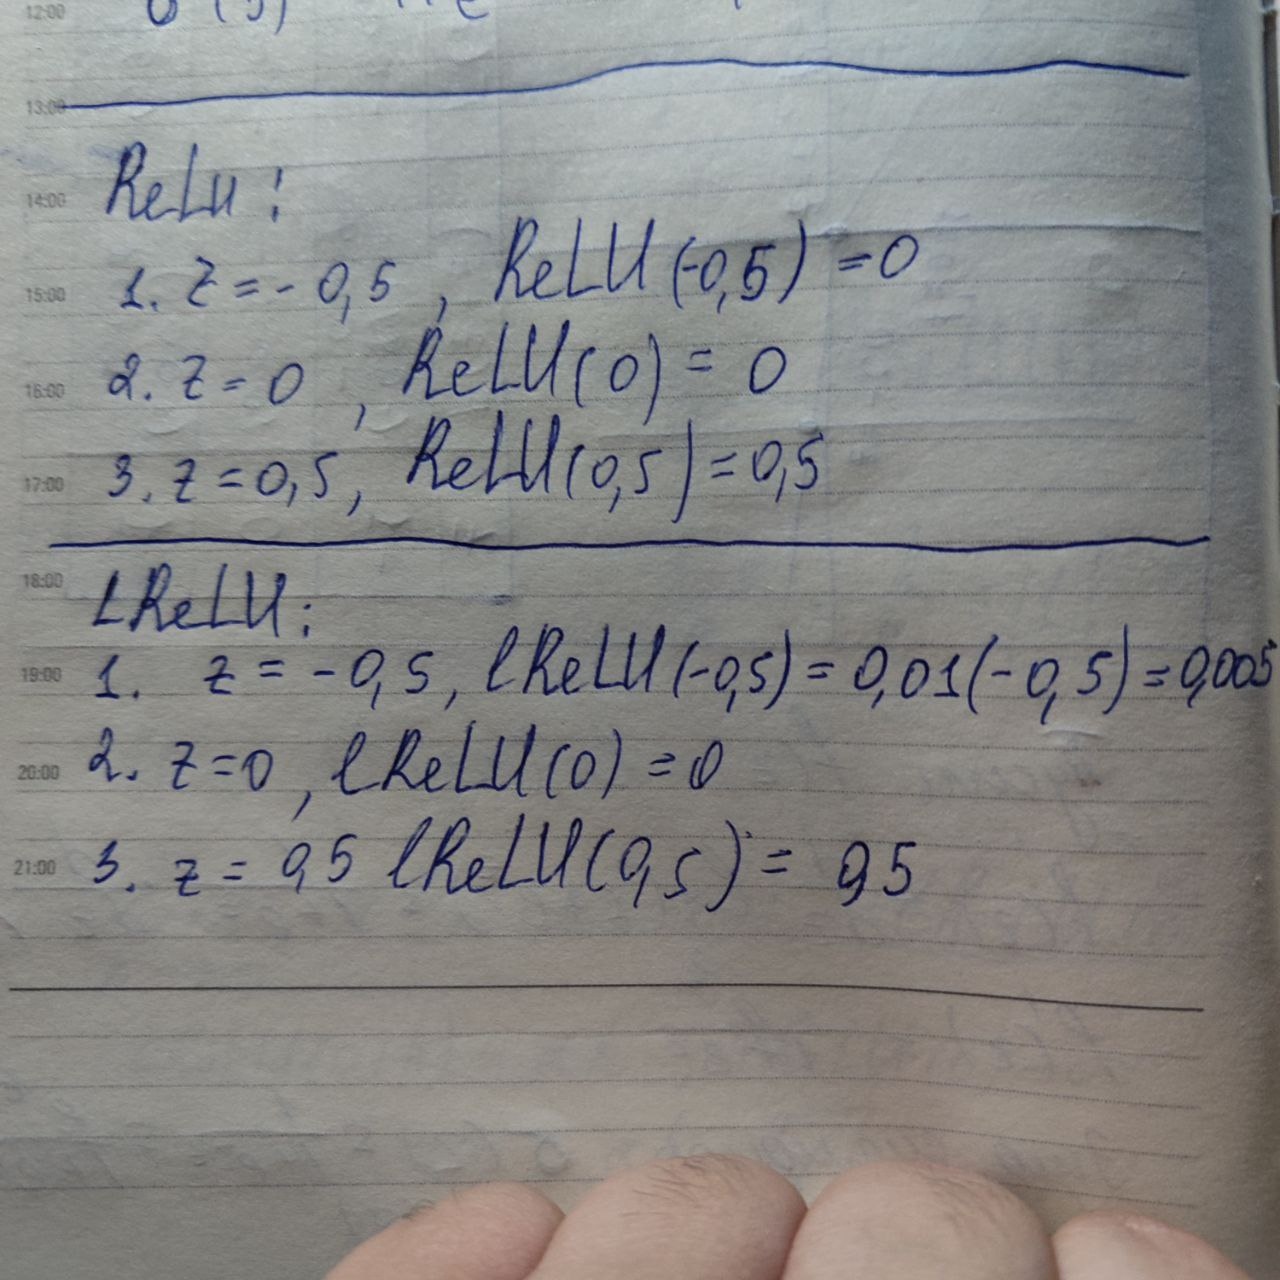

In [1]:
from IPython.display import Image, display
display(Image(filename='1.jpg'))

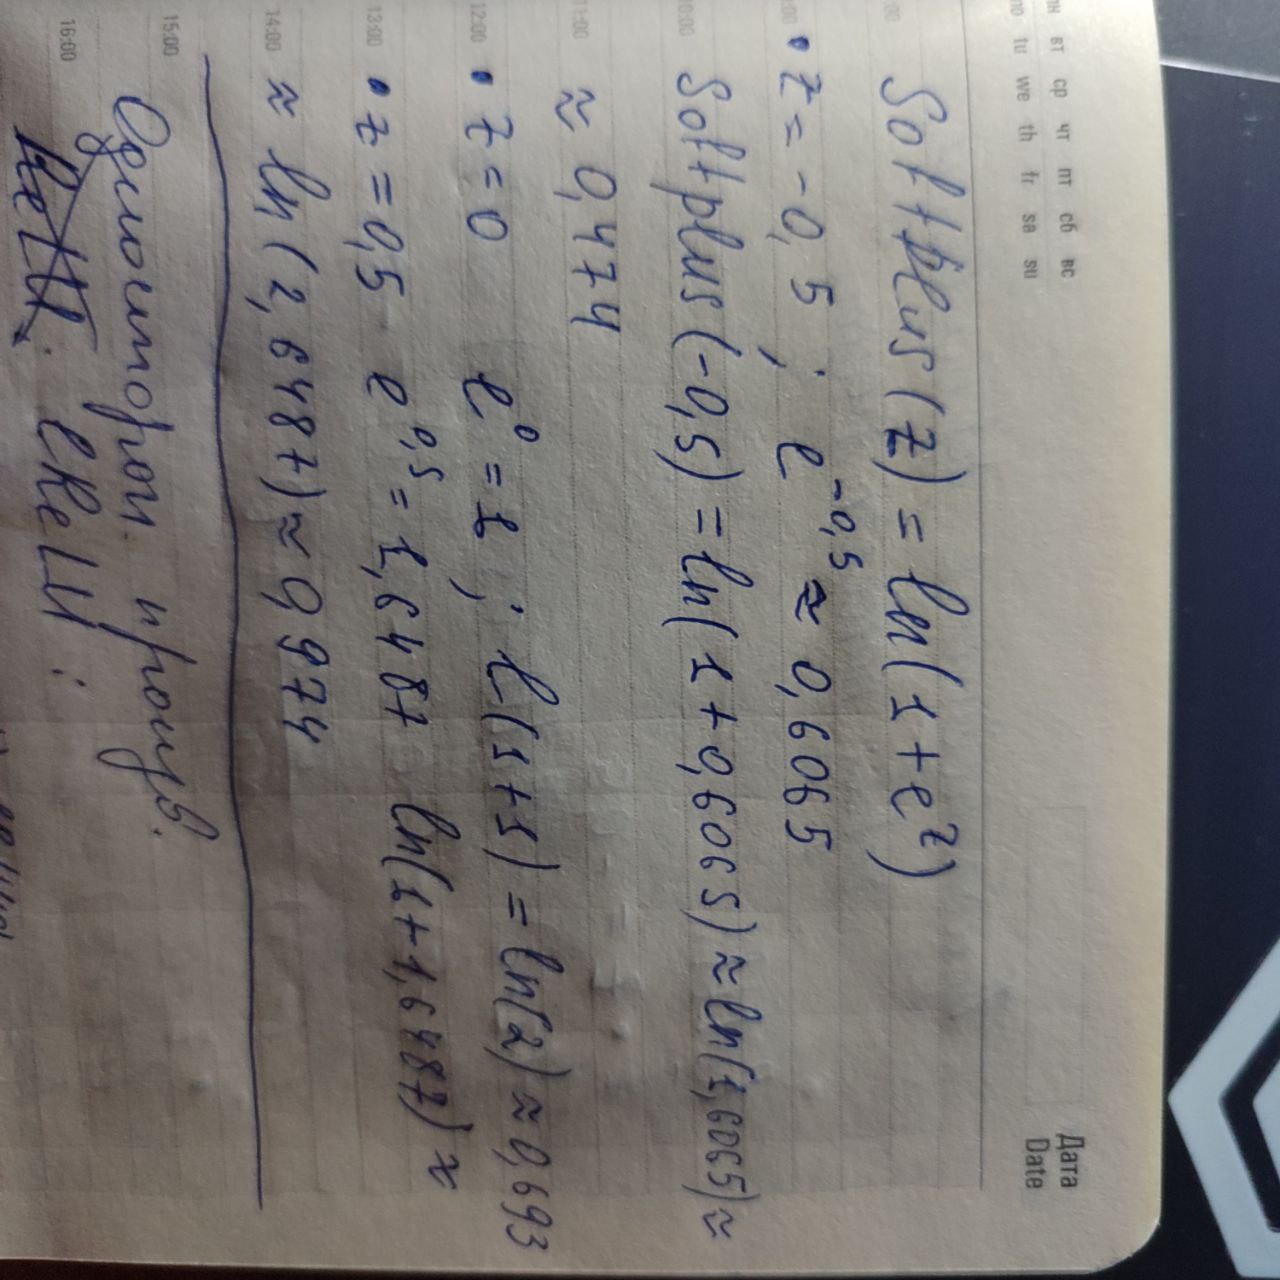

15

3

In [ ]:
from IPython.display import Image, display
display(Image(filename='4.jpg'))

Односторонние производные ReLU, Leaky ReLU в z = 0 (через пределы).

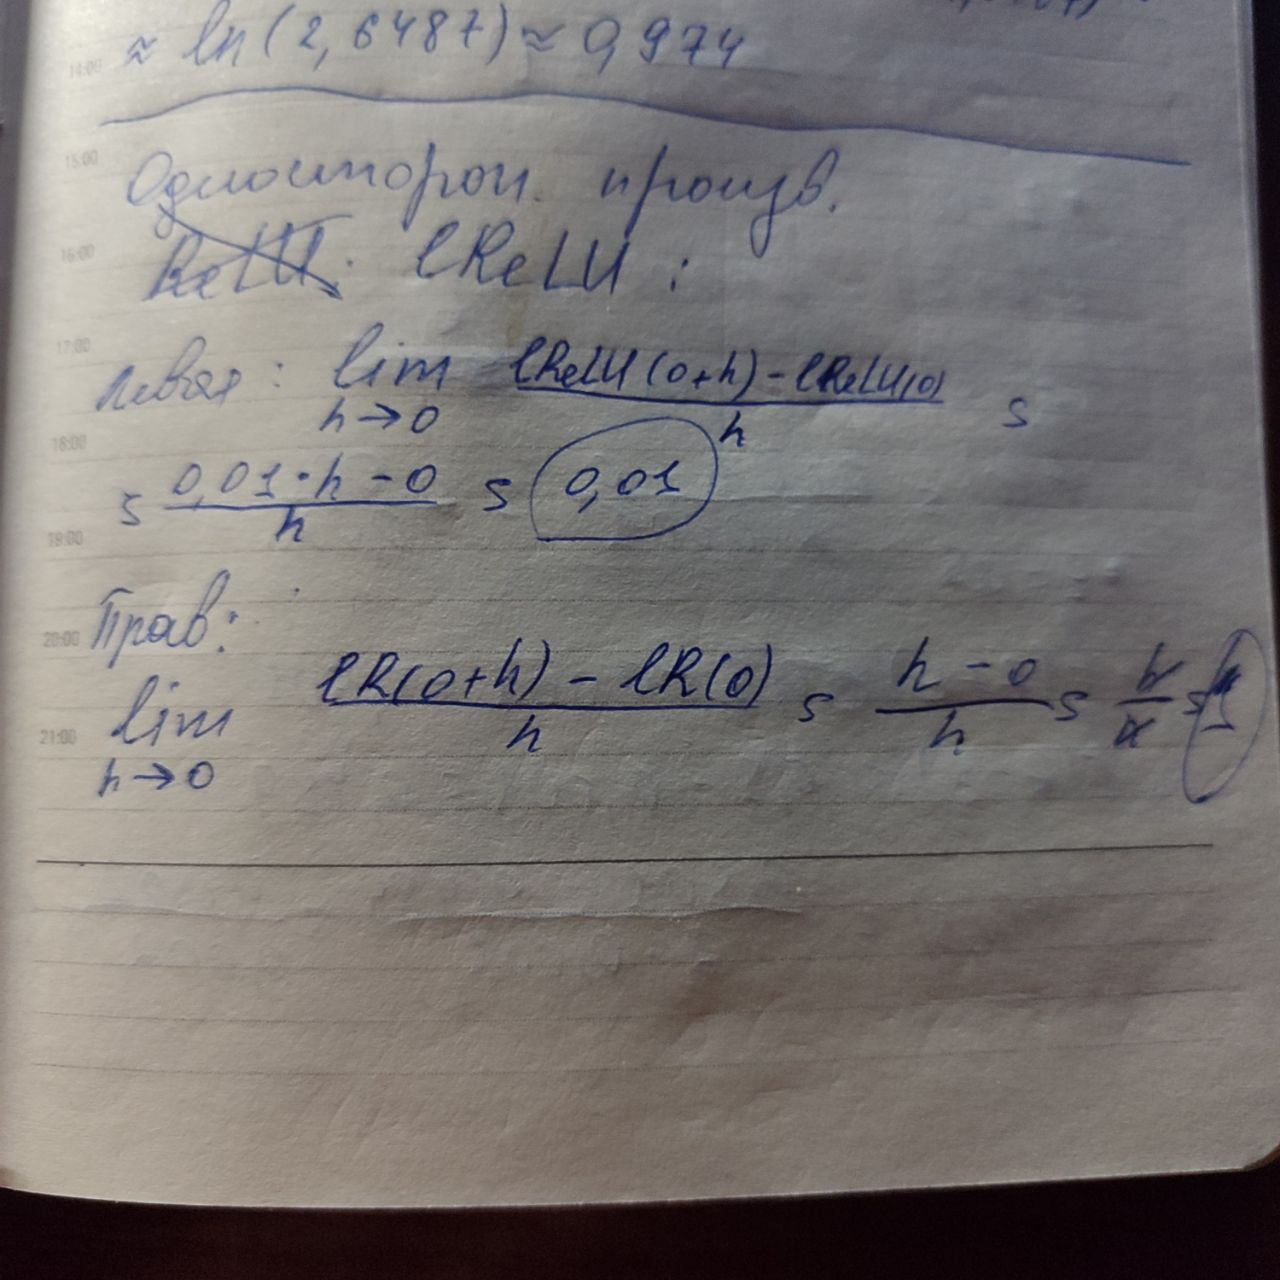

In [7]:
from IPython.display import Image, display
display(Image(filename='2.jpg'))

Приближённые производные (ε = 0.001) для каждой функции и zᵢ.

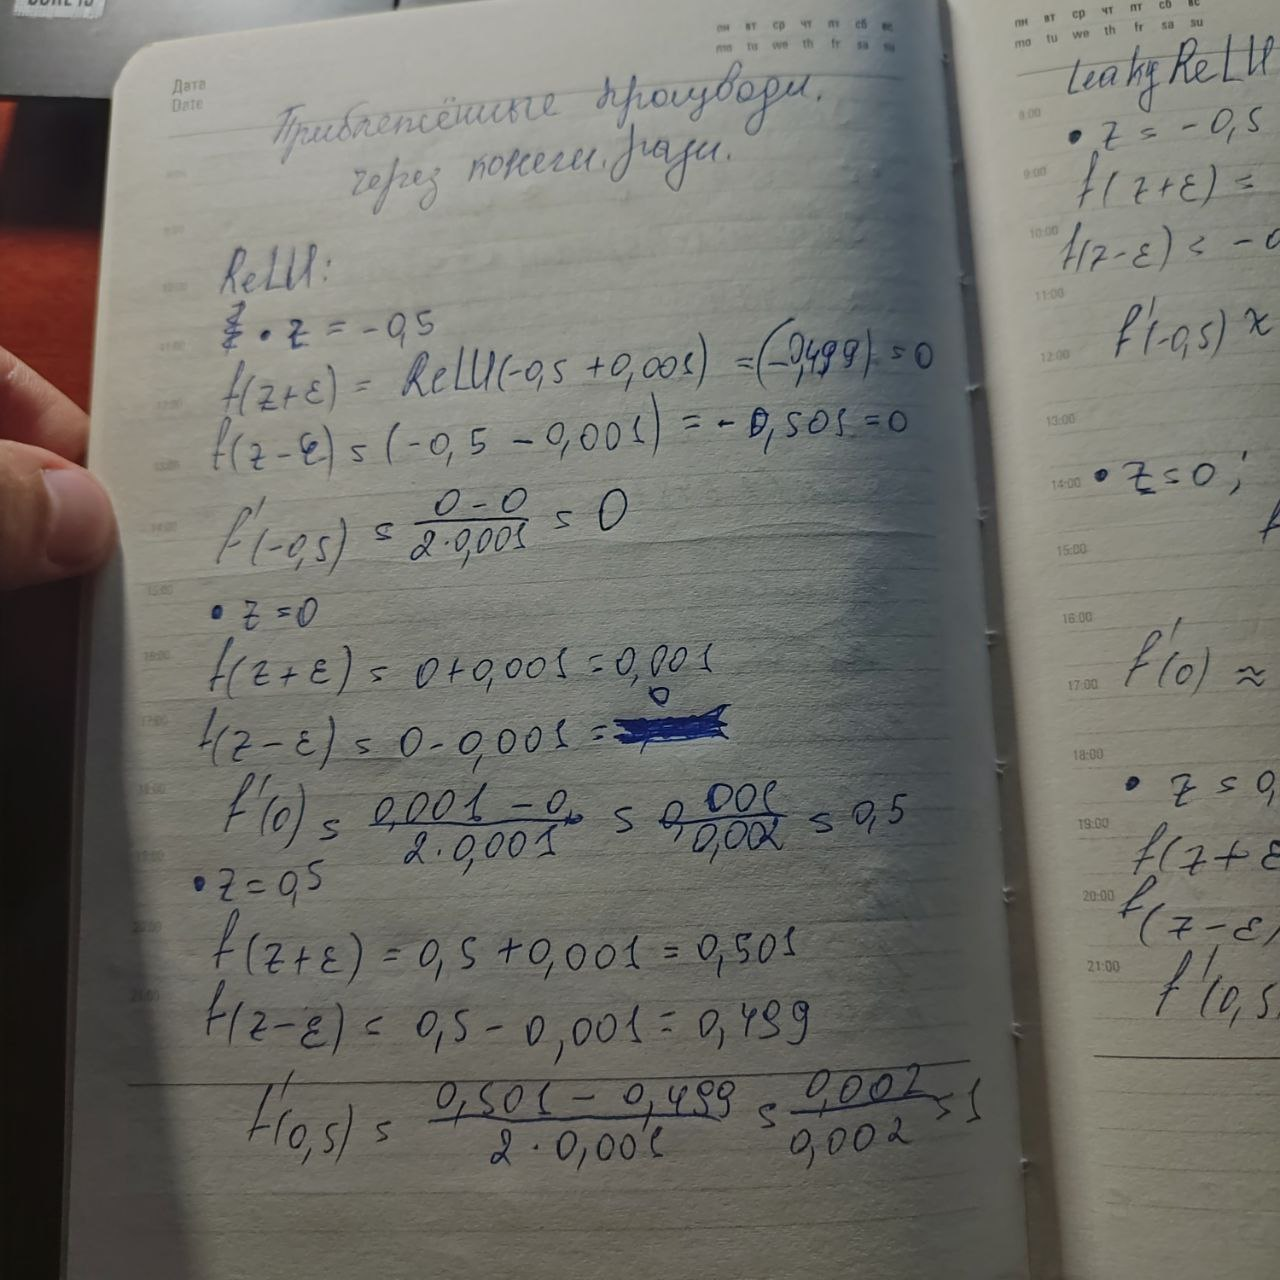

In [13]:
from IPython.display import Image, display
display(Image(filename='6.jpg'))

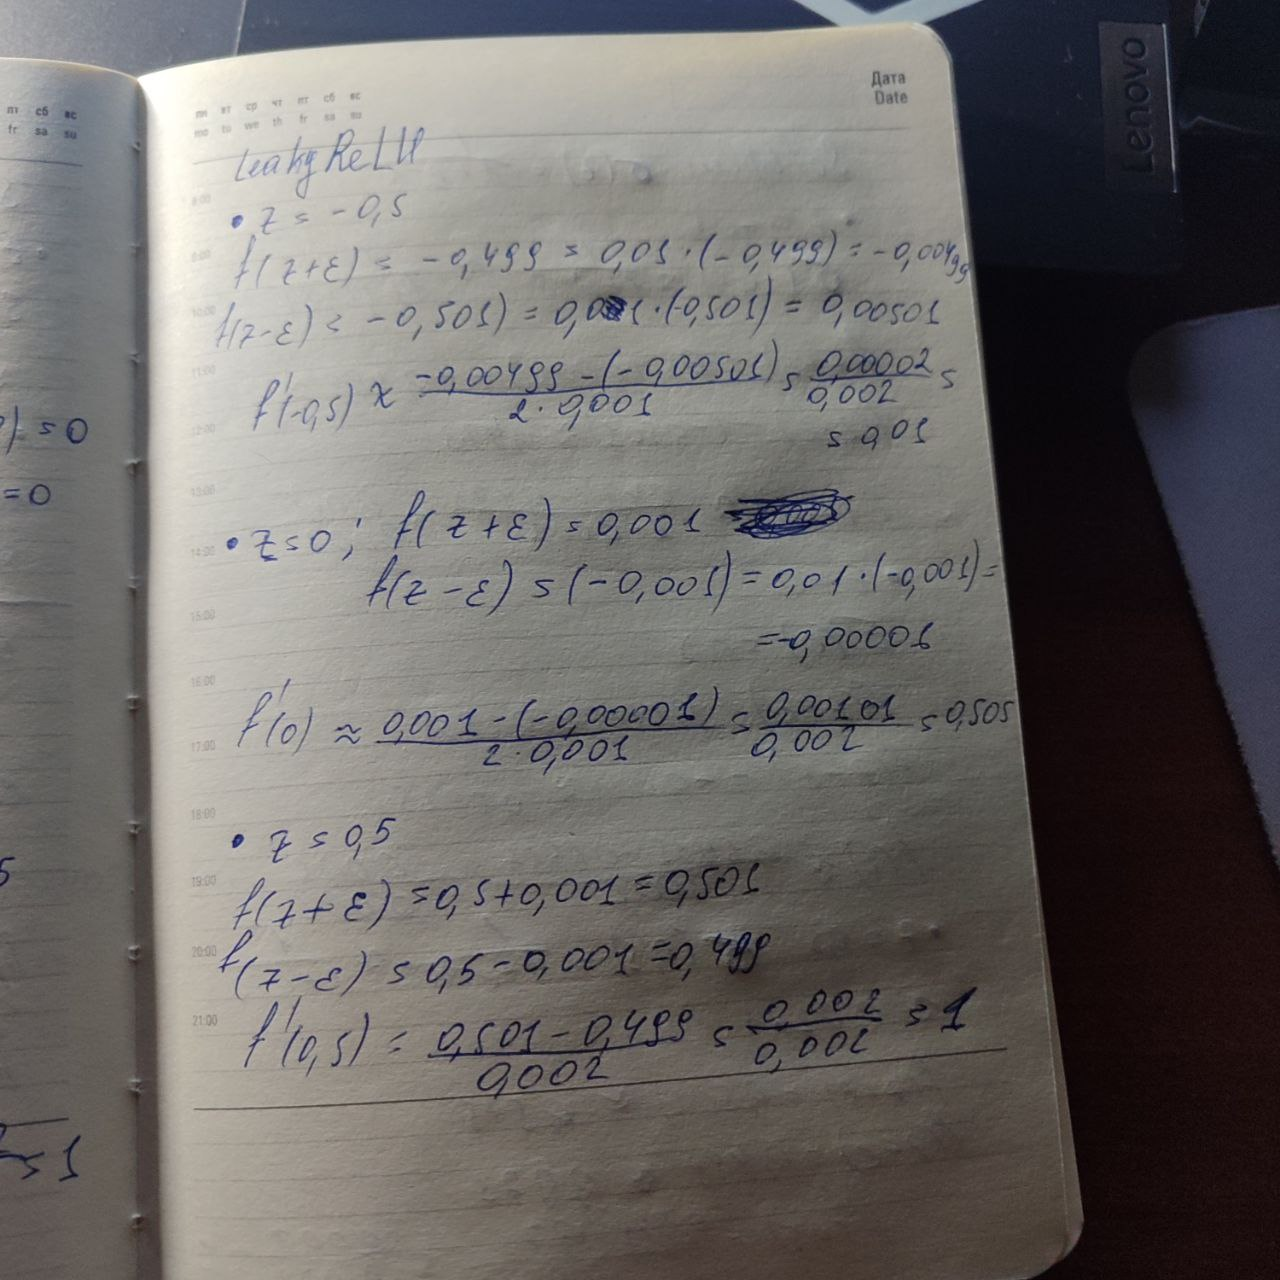

In [14]:
from IPython.display import Image, display
display(Image(filename='3.jpg'))

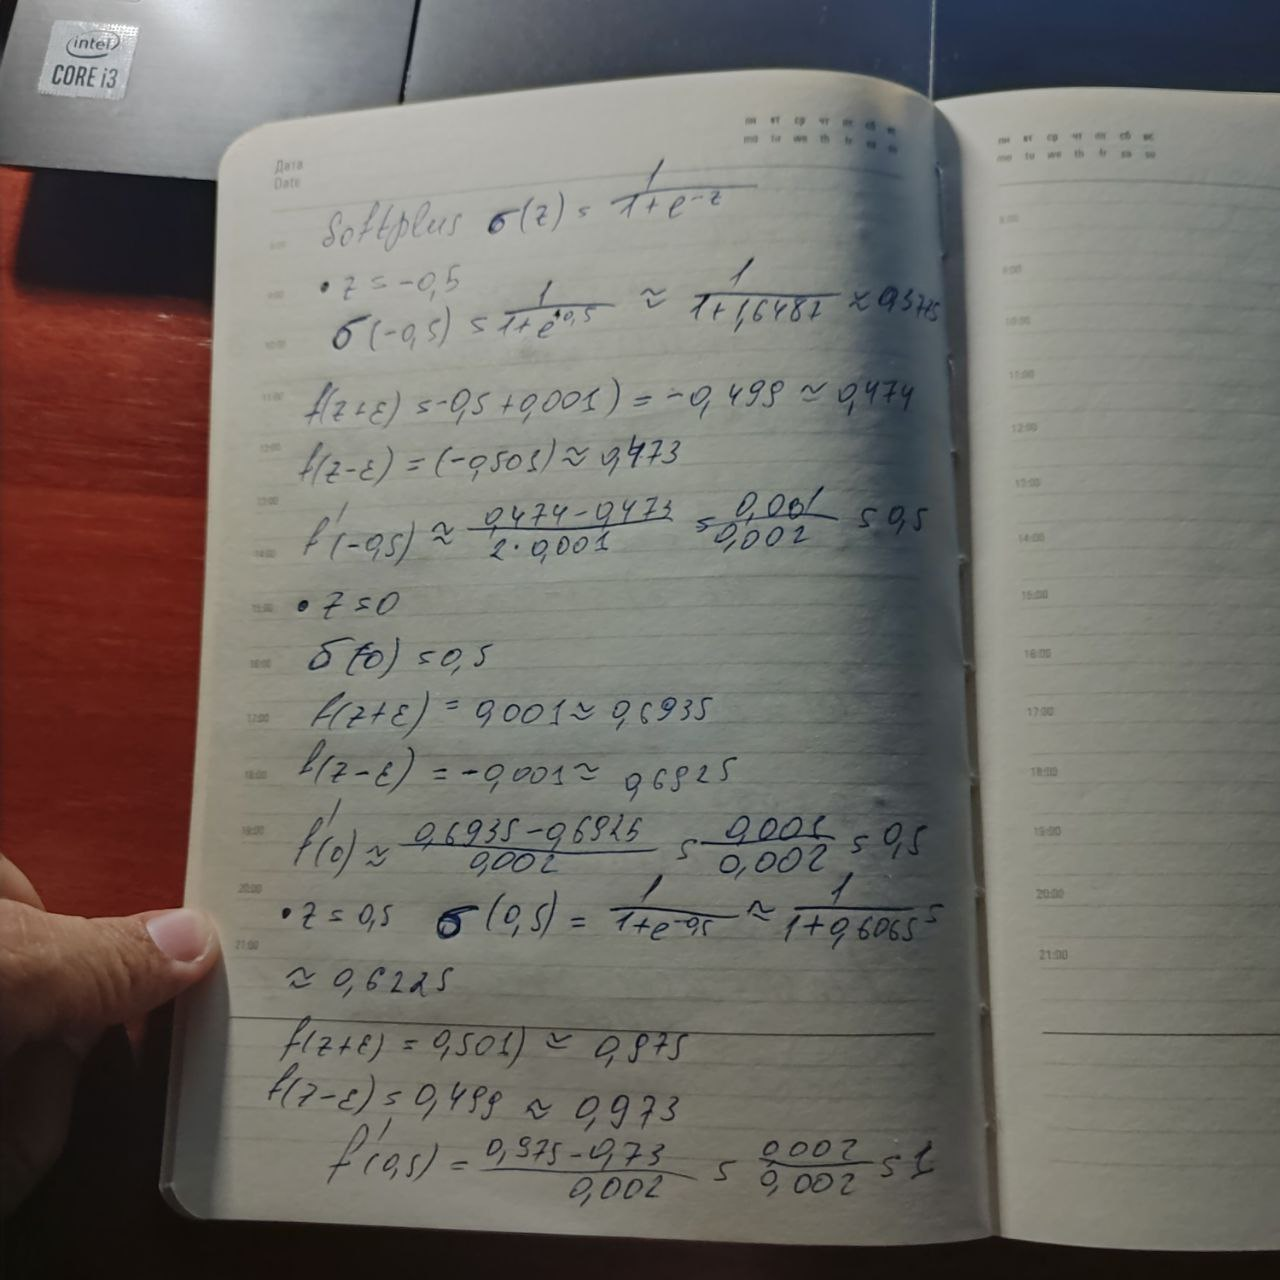

In [15]:
from IPython.display import Image, display
display(Image(filename='5.jpg'))

## 3.4

Выбор функции активации напрямую влияет на скорость и стабильность обучения нейросетей. ReLU проста и быстра в вычислениях, но её главный недостаток мертвые нейроны если вход нейрона постоянно отрицателен, градиент ReLU равен нулю, и веса перестают обновляться. Например, если нейрон с ReLU получает только отрицательные сигналы например, из-за плохой инициализации весов, он замораживается, и его вклад в обучение становится нулевым. Leaky ReLU частично решает эту проблему, добавляя малый градиент, но всё ещё имеет скачки, что может вызывать нестабильность. Softplus, наоборот, гладкая и дифференцируема всюду, её производная сигмоида, которая плавно передает градиенты. Однако вычисление экспоненты и логарифма делает её медленнее, а при больших z  возможны переполнения. В экспериментах видно, что метод конечных разностей точно воспроизводит сигмоиду для Softplus, но «смазывает» резкие скачки ReLU и Leaky ReLU, что подтверждает гладкость и ненулевые градиенты улучшают обучение, особенно в глубоких сетях, где затухание градиентов критично.